In [1]:
# Preferir fazer pelo terminal

# !pip install graphviz==0.9
# !pip install pydot
# !pip install seaborn==0.9.0

# !apt-get install graphviz

In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

preco  vendido  idade_do_modelo   km_por_ano
0   30941.02        1               18  35085.22134
1   40557.96        1               20  12622.05362
2   89627.50        0               12  11440.79806
3   95276.14        0                3  43167.32682
4  117384.68        1                4  12770.11290

In [3]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

preco  vendido  idade_do_modelo   km_por_ano
4999  74023.29        0               12  24812.80412
5322  84843.49        0               13  23095.63834
5319  83100.27        0               19  36240.72746
5316  87932.13        0               16  32249.56426
5315  77937.01        0               15  28414.50704

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [6]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

preco  vendido  idade_do_modelo   km_por_ano  modelo
0   30941.02        1               18  35085.22134      18
1   40557.96        1               20  12622.05362      24
2   89627.50        0               12  11440.79806      14
3   95276.14        0                3  43167.32682       6
4  117384.68        1                4  12770.11290       5

In [7]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [8]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [9]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


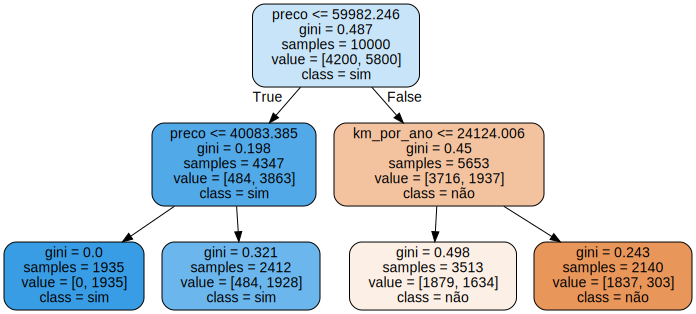

In [10]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [11]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


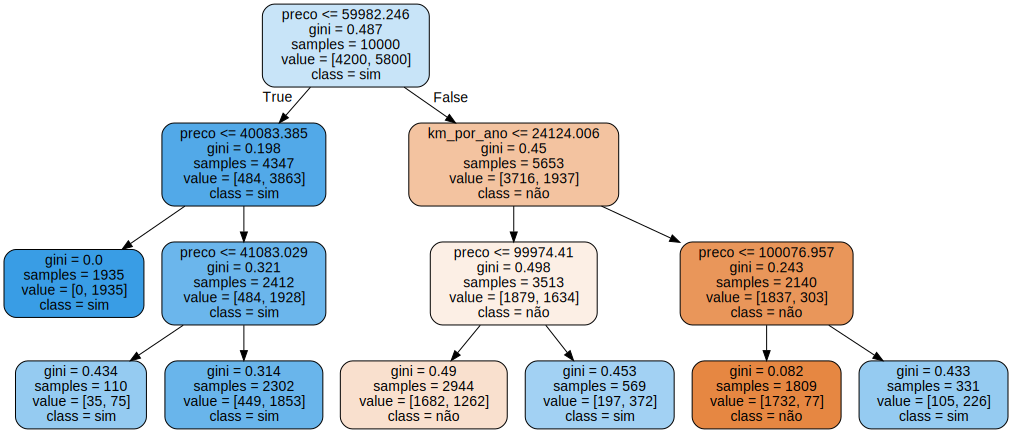

In [12]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [13]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 77.19
Intervalo [75.26, 79.13]


# Explorando hiper parâmetros em uma dimensão

In [14]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  #print("Arvore max_depth = %d, treino = %.2f, teste = %.2f" % (max_depth, train_score, test_score))
  tabela = [max_depth, train_score, test_score]
  return tabela
  
resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns= ["max_depth","train","test"])
resultados.head()

max_depth      train       test
0          1  75.791169  75.784219
1          2  75.791169  75.784219
2          3  78.750993  78.672633
3          4  78.787628  78.632803
4          5  78.941007  78.555912

<AxesSubplot:xlabel='max_depth', ylabel='train'>

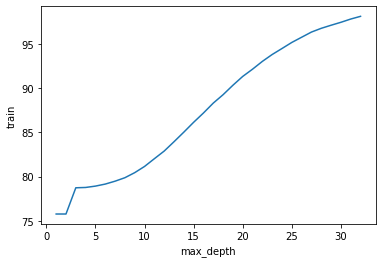

In [15]:
import seaborn as sns

sns.lineplot(x = "max_depth", y = "train", data = resultados)

# OVERFIT: ficou "perfeito" para o treino mas ruim para o teste

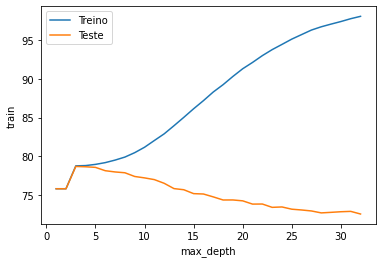

In [16]:
import matplotlib.pyplot as plt

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "Teste"])

In [17]:
resultados.sort_values("test", ascending=False).head()

max_depth      train       test
2          3  78.750993  78.672633
3          4  78.787628  78.632803
4          5  78.941007  78.555912
5          6  79.170115  78.123266
6          7  79.496806  77.963185

# Explorando hiper parâmetros em 2 dimensões

In [18]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  #print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

max_depth  min_samples_leaf      train       test
0          1                32  75.791169  75.784219
1          1                64  75.791169  75.784219
2          1               128  75.791169  75.784219
3          1               256  75.791169  75.784219
4          2                32  75.791169  75.784219

In [19]:
resultados.sort_values("test", ascending=False).head()

max_depth  min_samples_leaf      train       test
15          4               256  78.750993  78.672633
12          4                32  78.750993  78.672633
14          4               128  78.750993  78.672633
13          4                64  78.750993  78.672633
8           3                32  78.750993  78.672633

In [20]:
corr = resultados.corr()
corr

max_depth  min_samples_leaf     train      test
max_depth         1.000000e+00     -2.780775e-16  0.536705 -0.027675
min_samples_leaf -2.780775e-16      1.000000e+00 -0.409676  0.349011
train             5.367048e-01     -4.096762e-01  1.000000  0.116466
test             -2.767507e-02      3.490111e-01  0.116466  1.000000

<AxesSubplot:>

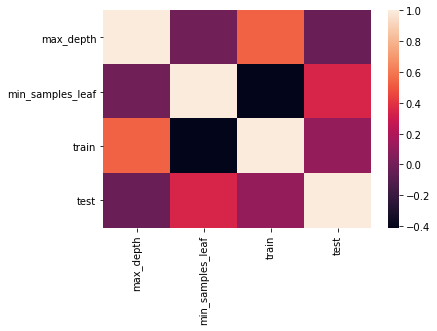

In [21]:
sns.heatmap(corr)

In [22]:
resultados

max_depth  min_samples_leaf      train       test
0            1                32  75.791169  75.784219
1            1                64  75.791169  75.784219
2            1               128  75.791169  75.784219
3            1               256  75.791169  75.784219
4            2                32  75.791169  75.784219
..         ...               ...        ...        ...
123         31               256  78.898753  77.848502
124         32                32  80.891161  76.844252
125         32                64  79.788793  77.302229
126         32               128  79.212171  78.221828
127         32               256  78.898753  77.848502

[128 rows x 4 columns]

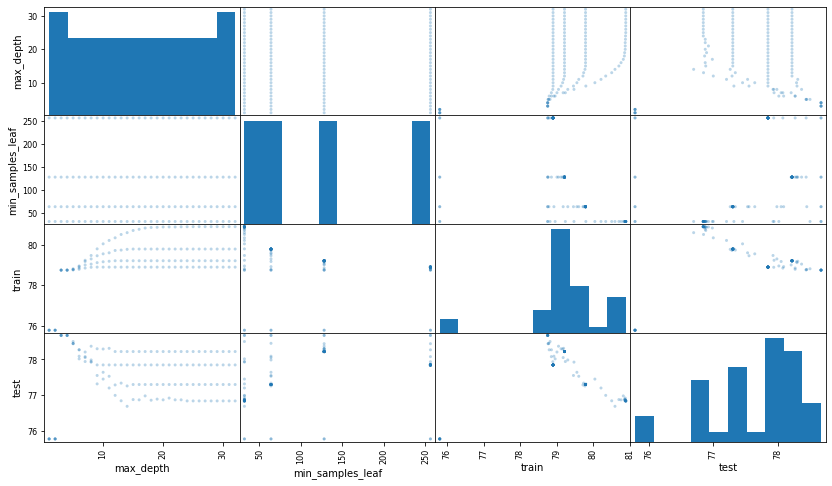

In [23]:
from pandas.plotting._misc import scatter_matrix

scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)
plt.show()

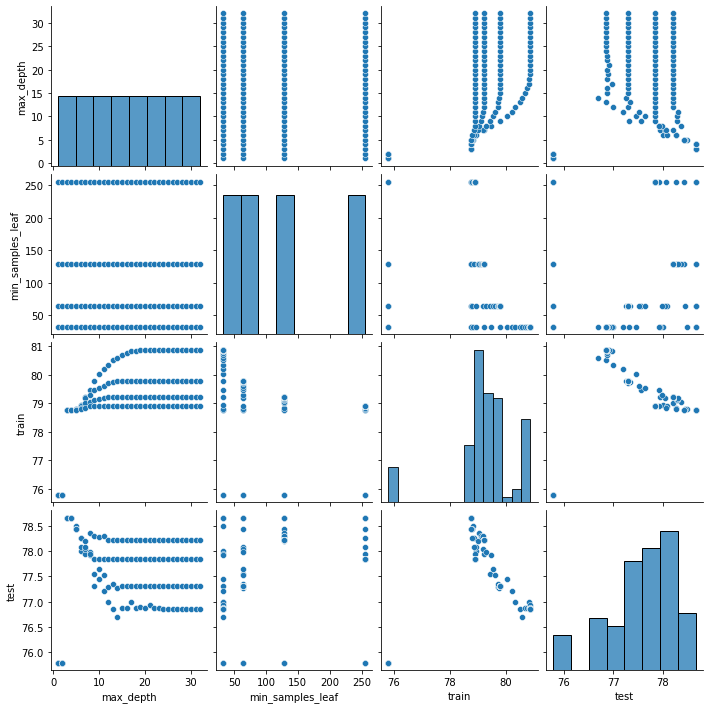

In [24]:
sns.pairplot(resultados)

<AxesSubplot:>

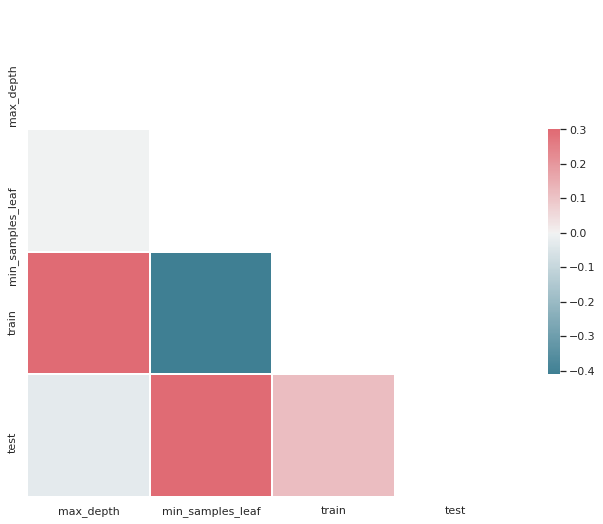

In [25]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)                         # funciona no seaborn 0.11.1

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

max_depth  min_samples_leaf      train       test
0          1               128  75.791169  75.784219
1          1               192  75.791169  75.784219
2          1               256  75.791169  75.784219
3          1               512  75.791169  75.784219
4          2               128  75.791169  75.784219

In [27]:
corr = resultados.corr()

<ipython-input-28-cbfd79cd604b>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

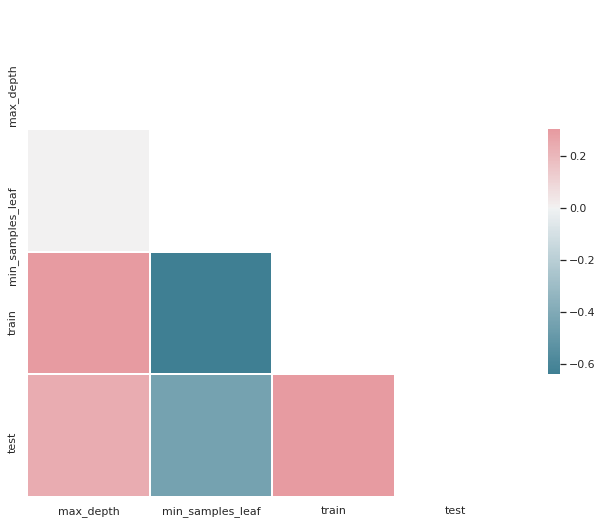

In [28]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
resultados.sort_values("test", ascending=False).head()

max_depth  min_samples_leaf      train       test
13          4               192  78.750993  78.672633
8           3               128  78.750993  78.672633
9           3               192  78.750993  78.672633
10          3               256  78.750993  78.672633
14          4               256  78.750993  78.672633

# Explorando 3 dimensões de hiper parâmetros

In [30]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","min_samples_split","train","test", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()


max_depth  min_samples_leaf  min_samples_split      train       test  \
0          1                32                 32  75.791169  75.784219   
1          1                32                 64  75.791169  75.784219   
2          1                32                128  75.791169  75.784219   
3          1                32                256  75.791169  75.784219   
4          1                64                 32  75.791169  75.784219   

   fit_time  score_time  
0  0.009474    0.003113  
1  0.007590    0.002727  
2  0.007588    0.002742  
3  0.007621    0.002727  
4  0.007747    0.002761

In [31]:
corr = resultados.corr()


<AxesSubplot:>

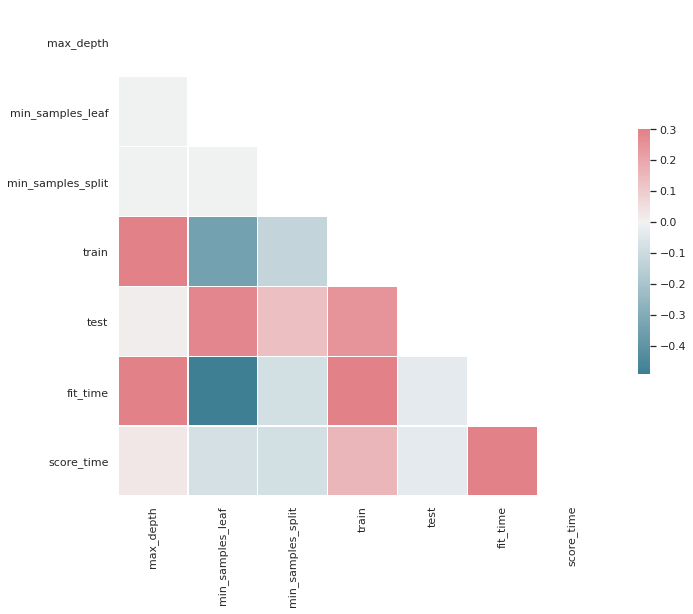

In [32]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
resultados.sort_values("test", ascending=False).head()

max_depth  min_samples_leaf  min_samples_split      train       test  \
63          4               256                256  78.750993  78.672633   
48          4                32                 32  78.750993  78.672633   
34          3                32                128  78.750993  78.672633   
35          3                32                256  78.750993  78.672633   
36          3                64                 32  78.750993  78.672633   

    fit_time  score_time  
63  0.014982    0.002842  
48  0.015601    0.002876  
34  0.013231    0.002825  
35  0.013238    0.002834  
36  0.013179    0.002839